In [41]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from google.colab import files
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as sm 

In [42]:
!python --version
!statsmodels --version
!matplotlib --version
!scipy --version
!numpy --version
!pandas --version

Python 3.7.12
/bin/bash: statsmodels: command not found
/bin/bash: matplotlib: command not found
/bin/bash: scipy: command not found
/bin/bash: numpy: command not found
/bin/bash: pandas: command not found


In [43]:
!pip show statsmodels

Name: statsmodels
Version: 0.10.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pandas, patsy, scipy
Required-by: plotnine


In [44]:
!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: cycler, python-dateutil, numpy, kiwisolver, pyparsing
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


In [45]:
!pip show scipy

Name: scipy
Version: 1.4.1
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: yellowbrick, xgboost, Theano-PyMC, statsmodels, sklearn-pandas, seaborn, scs, scikit-learn, scikit-image, resampy, qdldl, pymc3, plotnine, osqp, mlxtend, missingno, matplotlib-venn, lightgbm, librosa, jaxlib, jax, imgaug, imbalanced-learn, hyperopt, gym, gensim, fastai, fa2, ecos, cvxpy, arviz, albumentations


In [46]:
!pip show numpy

Name: numpy
Version: 1.21.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, scikit-image, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pycocotools, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, fix-yahoo-f

In [47]:
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, numpy, pytz
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, arviz, altair


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# covid = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/us-counties.csv')
# covid = covid[covid['date'] == '2020-06-30']
# covid = covid.drop(['date', 'county', 'state'], axis = 1)
# covid = covid.dropna()
# covid['fips'] = covid['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])
# covid['fips'].nunique()

In [50]:
data = pd.read_csv('/content/drive/My Drive/COVID19_Cities/Data/wave1_data.csv')

# data = data[['fips', 'popdense', 'population', 'ageab55', 'ageab65', 'ageab75', 'pctpov', 'pctmale', 'pctblack', 'pcthispanic', 'type', 'pct_highschool_or_less', 'no2', 'ozone', 'pm25', 'so2']]
# data['fips'] = data['fips'].astype(int).astype(str).apply(lambda x: x.zfill(5)[0:5])

# data = data.merge(covid, on='fips')
# data['cases rate 10k'] = data['cases'] / data['population'] * 10000
# data['deaths rate 10k'] = data['deaths'] / data['population'] * 10000
# data['deaths cases 10k'] = data['deaths'] / data['cases'] * 10000

# data[data['type'] == 0].to_csv('ZoneA_wave1.csv')
# data[data['type'] == 1].to_csv('ZoneB_wave1.csv')
cdata = data
# data.head()

cdata['ageab65'] = cdata['ageab65'] * 100
cdata['type'].value_counts()

0    64
1    54
Name: type, dtype: int64

In [51]:
ttest_ind(cdata[cdata['type'] == 0]['pcthispanic'], cdata[cdata['type'] == 1]['pcthispanic'])

Ttest_indResult(statistic=1.3584127727355004, pvalue=0.17696867563617225)

(array([21., 13., 15.,  7.,  4.,  2.,  0.,  0.,  1.,  1.]),
 array([ 1.6335914 ,  9.92640226, 18.21921312, 26.51202398, 34.80483484,
        43.0976457 , 51.39045656, 59.68326742, 67.97607828, 76.26888914,
        84.5617    ]),
 <a list of 10 Patch objects>)

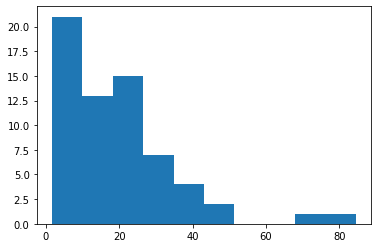

In [52]:
plt.hist(cdata[cdata['type'] == 0]['pcthispanic'])


(array([30., 10.,  4.,  3.,  1.,  2.,  2.,  1.,  0.,  1.]),
 array([ 1.5874445 ,  9.72372645, 17.8600084 , 25.99629035, 34.1325723 ,
        42.26885425, 50.4051362 , 58.54141815, 66.6777001 , 74.81398205,
        82.950264  ]),
 <a list of 10 Patch objects>)

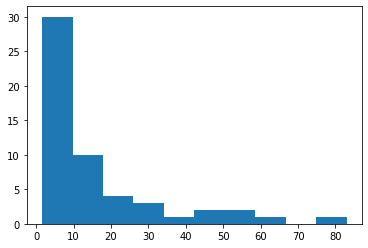

In [53]:
plt.hist(cdata[cdata['type'] == 1]['pcthispanic'])


### Viz

#### Correlation

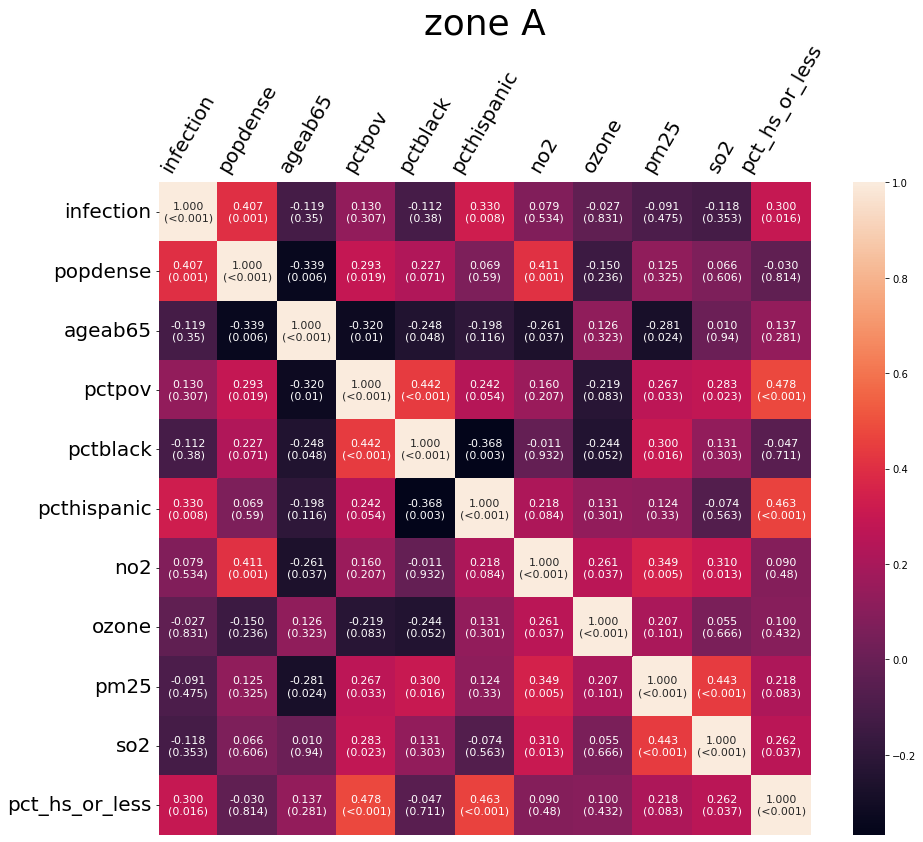

In [54]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 0]

df = rdata[['cases rate 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone A', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_infection_zoneA_wave1.svg", format="svg")
plt.savefig("corr_infection_zoneA_wave1.png")
# files.download("corr1.svg")
plt.show()

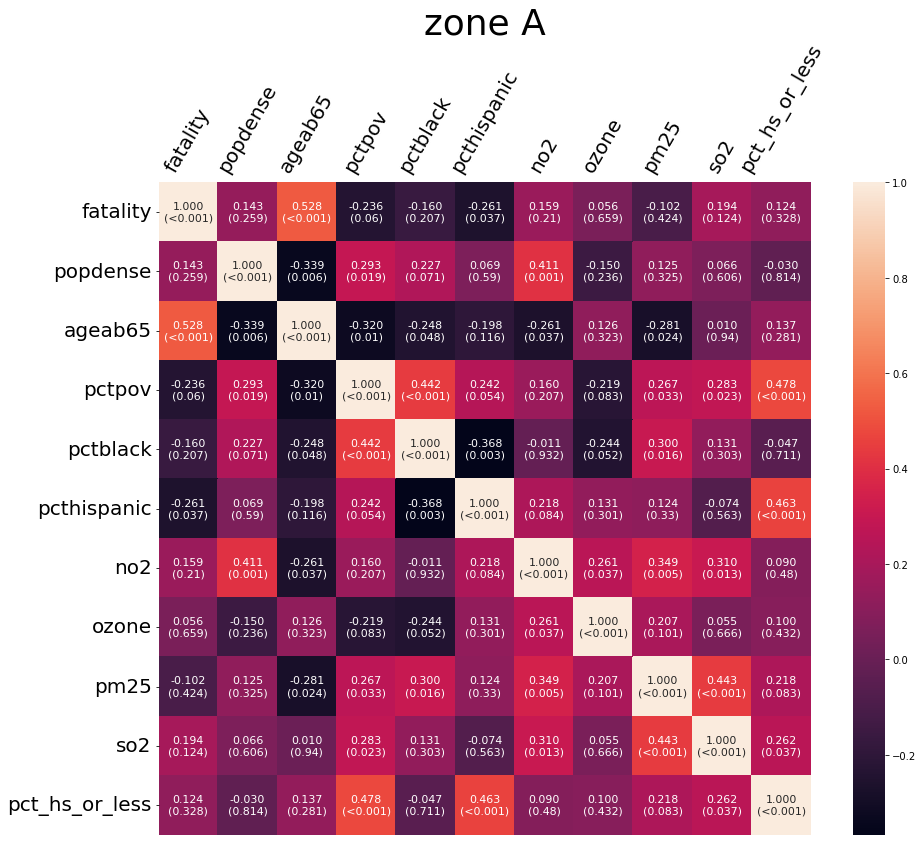

In [55]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 0]

df = rdata[['deaths cases 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone A', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_fatality_zoneA_wave1.svg", format="svg")
plt.savefig("corr_fatality_zoneA_wave1.png")
# files.download("corr1.svg")
plt.show()

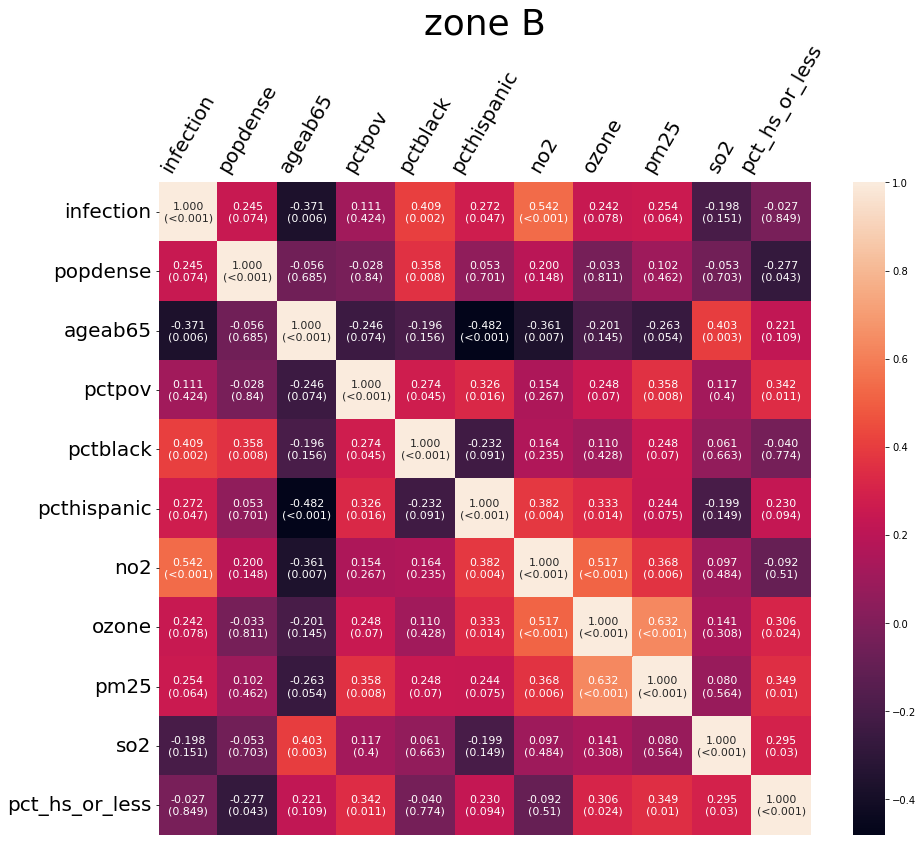

In [56]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 1]

df = rdata[['cases rate 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['infection', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone B', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_infection_zoneB_wave1.svg", format="svg")
plt.savefig("corr_infection_zoneB_wave1.png")
# files.download("corr1.svg")
plt.show()

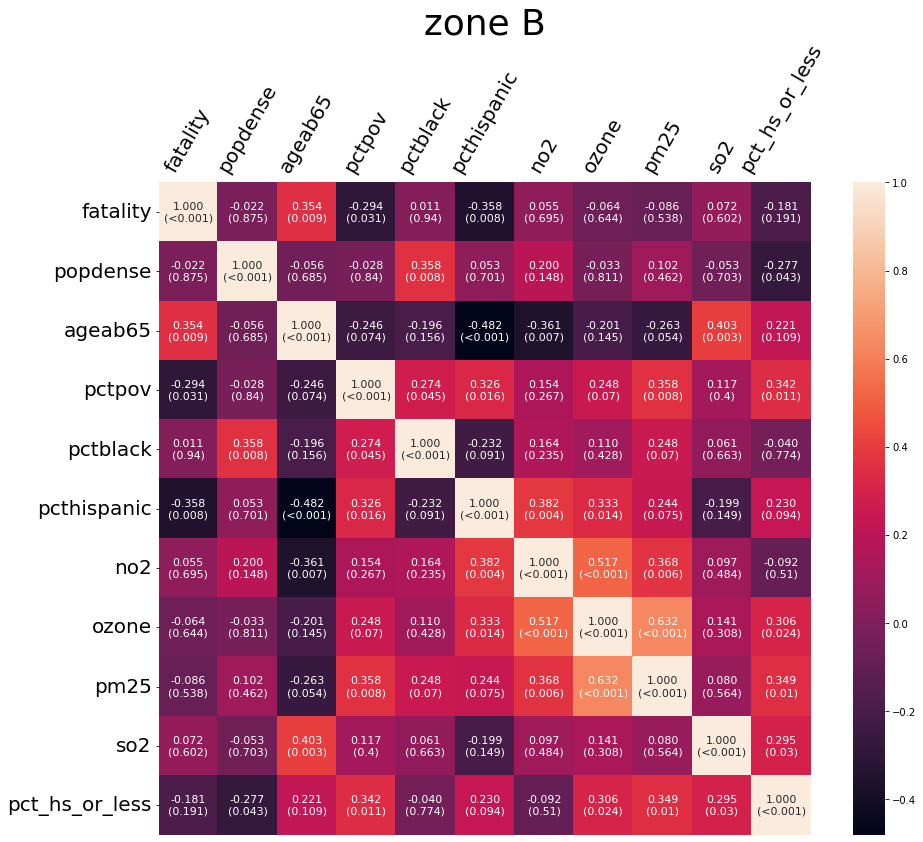

In [57]:
import seaborn as sns
import statsmodels.formula.api as sm 

# print(rdata['type'].value_counts())
i = 1
fig, ax = plt.subplots(1, 1, figsize=(15,12))
# sns.heatmap(corrdf, xticklabels=corrdf.columns.values, yticklabels=corrdf.columns.values, mask=pval)

rdata = cdata[cdata['type'] == 1]

df = rdata[['deaths cases 10k', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
corrdf = df.corr()

pval = [] 
for ii in range(df.shape[1]): # rows are the number of rows in the matrix.
    for jj in range(df.shape[1]):
        try:
            y = df.columns[ii]
            x = df.columns[jj]
            cval = stats.pearsonr(df[x],df[y])
            pval.append(round(cval[1], 3))
        except ValueError:
            pval.iloc[ii,jj]  = None
            
ax = sns.heatmap(corrdf, annot=True, fmt = '.3f', square=1, linewidths=0.0, annot_kws={"fontsize":11}, ax = ax, cbar=True)
n = 0
for j in range(n, len(ax.texts)): 
  if (str(pval[n]) != "0.0"):
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(" + str(pval[n]) + ")")
  else:
    ax.texts[j].set_text(ax.texts[j].get_text() + "\n(<0.001)")
  n += 1
  
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.set_xticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=60)
ax.set_yticklabels(fontsize=20, labels = ['fatality', 'popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_hs_or_less'], rotation=0)
ax.set_title('zone B', fontsize = 36)
# plt.subplot(int('14' + str(i)), sharex=ax[i-1])

plt.savefig("corr_fatality_zoneB_wave1.svg", format="svg")
plt.savefig("corr_fatality_zoneB_wave1.png")
# files.download("corr1.svg")
plt.show()

#### Boxplot

popdense popdense Ttest_indResult(statistic=2.72579318931897, pvalue=0.007409634046677541)
popdense popdensemean Zone A 869.0373482359375,mean Zone B 408.567505925926
popdense popdensestd Zone A 1195.3482547599463,std Zone B 361.7595012016118
ageab65 ageab65 Ttest_indResult(statistic=-2.008142415632229, pvalue=0.046951582996128005)
ageab65 ageab65mean Zone A 14.654251442379767,mean Zone B 15.641596714579338
ageab65 ageab65std Zone A 2.409173199281185,std Zone B 2.932044829416944
pctpov pctpov Ttest_indResult(statistic=0.5432745303138417, pvalue=0.5879832654896114)
pctpov pctpovmean Zone A 14.403125000000005,mean Zone B 13.959259259259259
pctpov pctpovstd Zone A 4.741675035560444,std Zone B 4.007988180156118
pctblack pctblack Ttest_indResult(statistic=2.93254675408404, pvalue=0.004051673751874871)
pctblack pctblackmean Zone A 20.1304292853125,mean Zone B 12.211004492037038
pctblack pctblackstd Zone A 16.479661543433917,std Zone B 12.027810020063553
pcthispanic pcthispanic Ttest_indResul

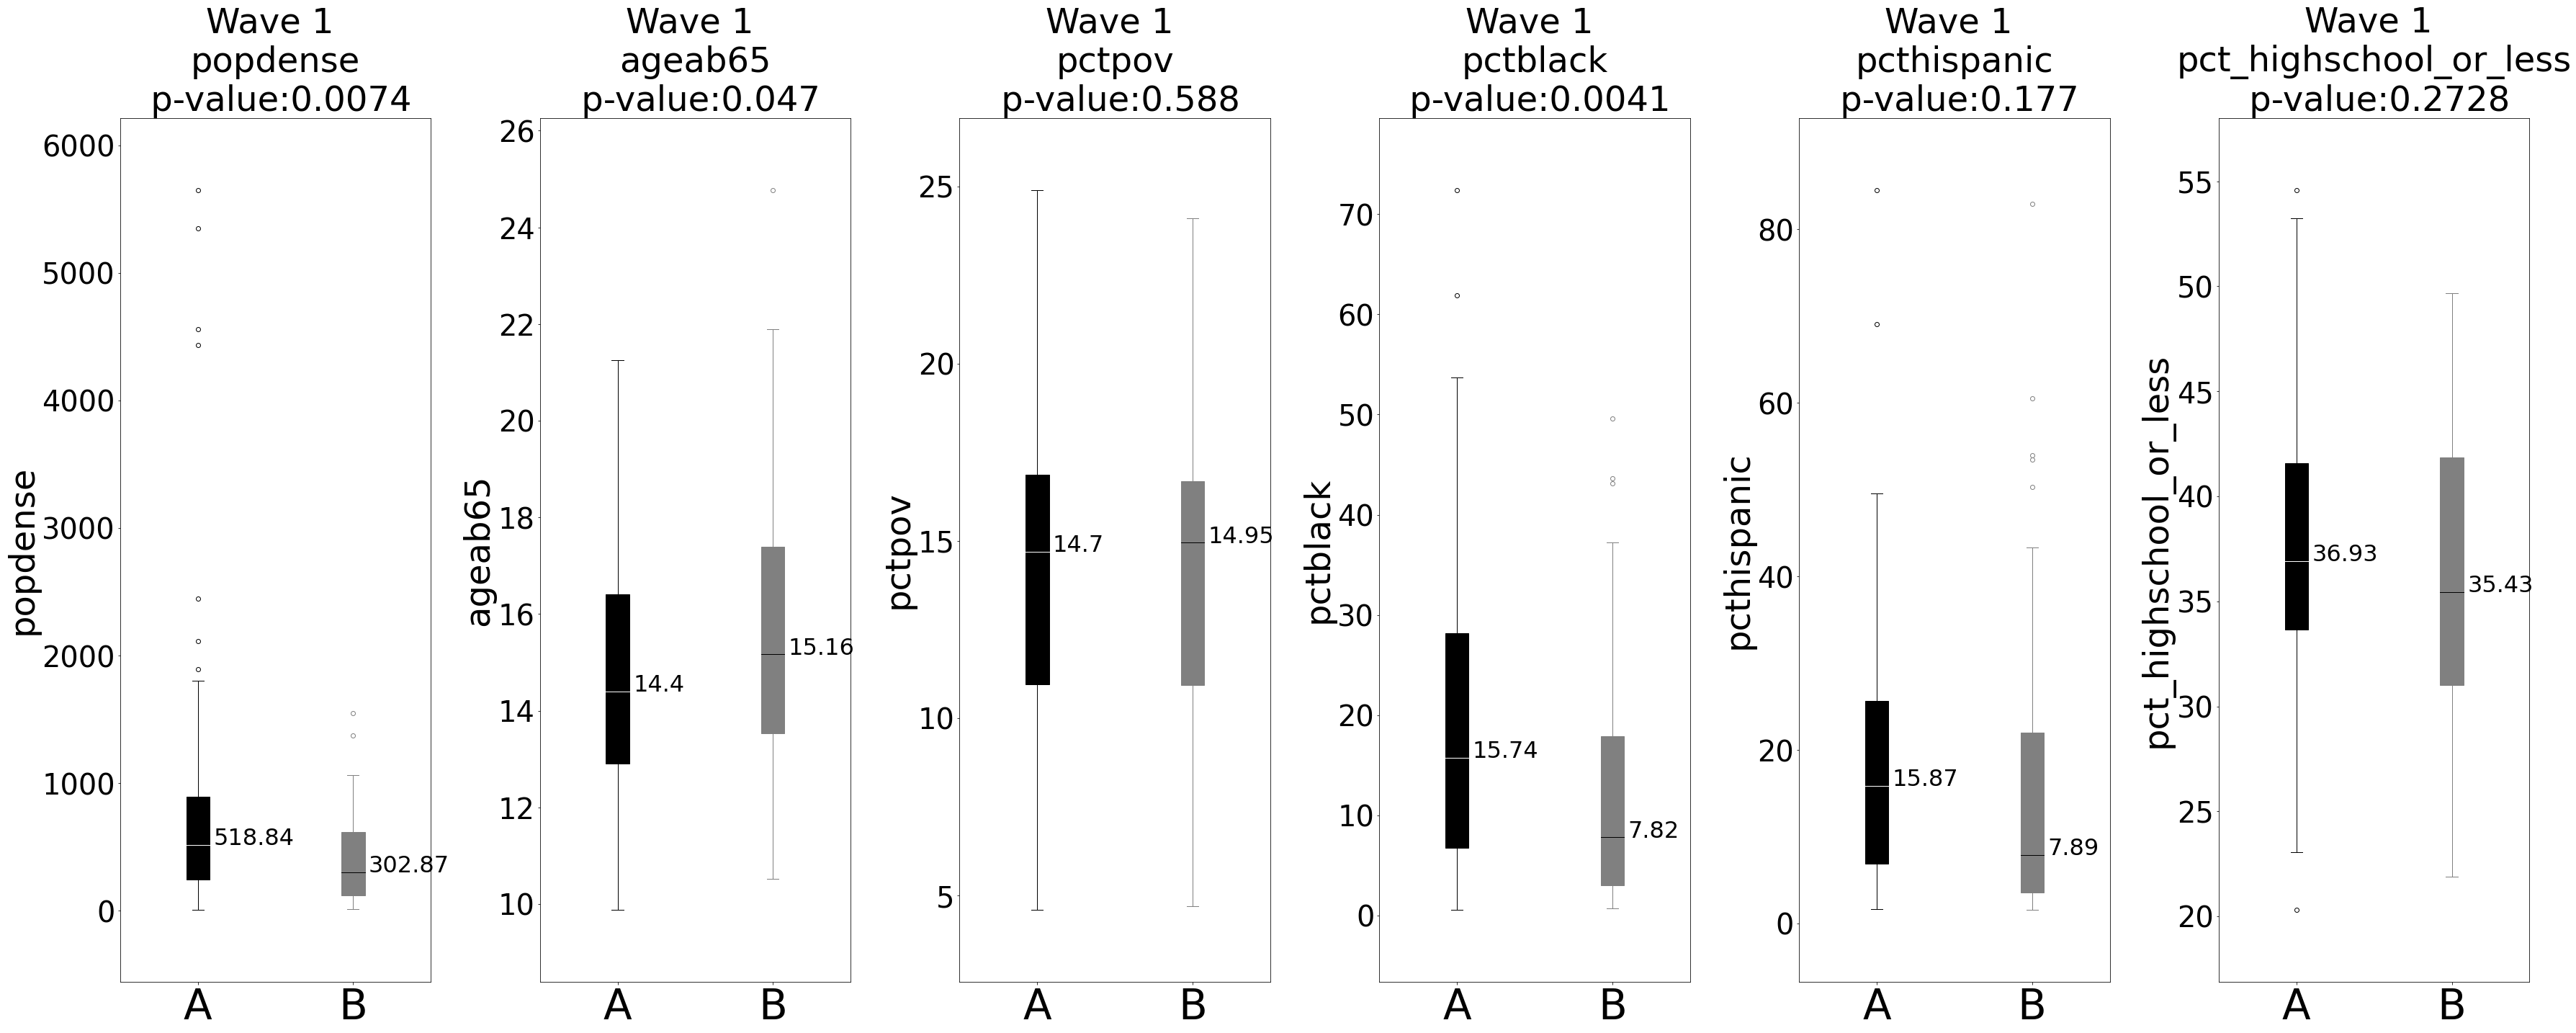

In [58]:
stats_result = pd.DataFrame(columns=['Name', 'T-test Statistics', 'T-Test p-value', 'Mann-Whitney U test Statistics', 'Mann-Whitney U test p-value'])

rdata = cdata.copy() 

rindex = [1, 2, 3, 4, 5, 6]
region = ['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'pct_highschool_or_less']

fig, ax = plt.subplots(1, 6,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],2)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],2)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Wave 1 \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)
  
  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para, 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.tight_layout(pad=1.0)
plt.savefig("demo_wave1.svg", format="svg")

no2 no2 Ttest_indResult(statistic=2.1747636431100235, pvalue=0.0316777945119927)
no2 no2mean Zone A 20.527805305750263,mean Zone B 17.810780594254105
no2 no2std Zone A 6.646816202478146,std Zone B 6.894818053687861
ozone ozone Ttest_indResult(statistic=1.1570457111787038, pvalue=0.24963077233306408)
ozone ozonemean Zone A 0.047097388295814564,mean Zone B 0.046141668444208236
ozone ozonestd Zone A 0.004107597536861543,std Zone B 0.004866176300508557
pm25 pm25 Ttest_indResult(statistic=-0.48738172728147733, pvalue=0.6269076382286091)
pm25 pm25mean Zone A 7.896437638790521,mean Zone B 8.036850378727769
pm25 pm25std Zone A 1.441010766717279,std Zone B 1.6888290389280758
so2 so2 Ttest_indResult(statistic=-2.042362898036264, pvalue=0.043382708990291625)
so2 so2mean Zone A 1.3849789862886681,mean Zone B 2.080894342915175
so2 so2std Zone A 0.8954862768164027,std Zone B 2.5474178777742864


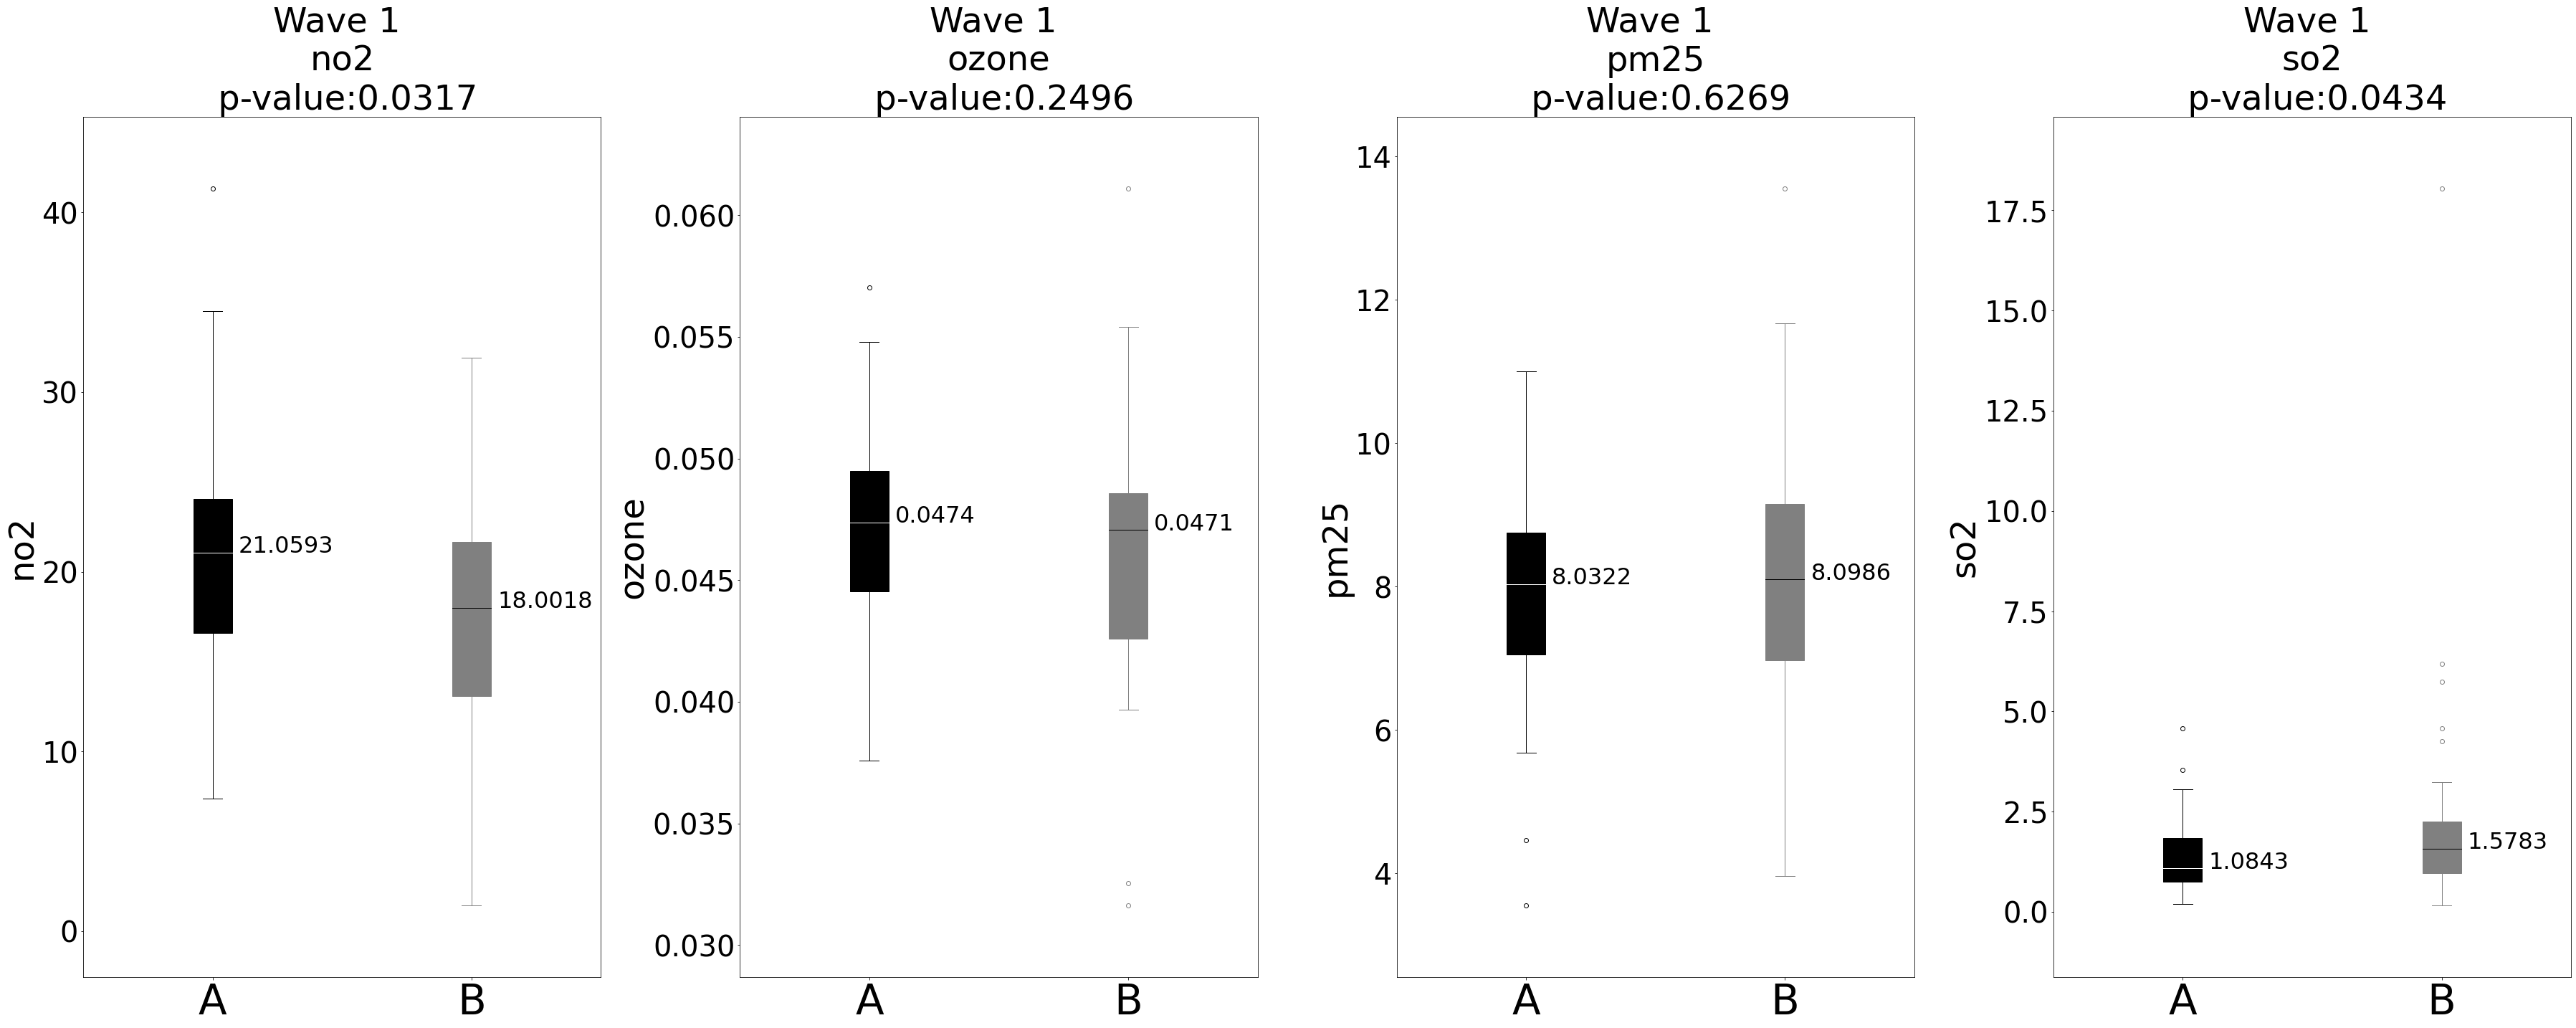

In [59]:
rdata = cdata.copy() 

rindex = [1, 2, 3, 4]
region = ['no2', 'ozone', 'pm25', 'so2']

fig, ax = plt.subplots(1, 4,figsize=(50,20))

for i in rindex:

  para = region[i-1]

  maincount = rdata[rdata['type'] == 0]
  buf100count = rdata[rdata['type'] == 1]

  q1cust1 = [np.quantile(maincount[para].to_list(), 0.25)]
  q1cust2 = [np.quantile(buf100count[para].to_list(), 0.25)]
  q2cust1 = [np.quantile(maincount[para].to_list(), 0.5)]
  q2cust2 = [np.quantile(buf100count[para].to_list(), 0.5)]
  q3cust1 = [np.quantile(maincount[para].to_list(), 0.75)]
  q3cust2 = [np.quantile(buf100count[para].to_list(), 0.75)]

  pdata = []
  pdata.append(maincount[para].tolist())
  pdata.append(buf100count[para].tolist())
  c = 'black'
  ax[i-1].boxplot(pdata[0], labels = ['A'], positions = [1], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='white'))
  
  c = 'grey'
  ax[i-1].boxplot(pdata[1], labels = ['B'], positions = [2], patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'))

  ax[i-1].text(1+0.1, q2cust1[0], str(round(q2cust1[0],4)), fontsize = 32)
  ax[i-1].text(2+0.1, q2cust2[0], str(round(q2cust2[0],4)), fontsize = 32)

  ax[i-1].tick_params(axis='y', which='major', labelsize=40)
  ax[i-1].tick_params(axis='x', which='major', labelsize=58)

  ax[i-1].margins(x=0.5, y=0.1)
  # ax[i-1].set_yscale('log')
  ax[i-1].set_ylabel(region[i-1], fontsize = 48)
  ax[i-1].set_title('Wave 1 \n' + region[i-1] + '\n p-value:' + str(np.round(ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 4)), fontsize = 48)
  
  # ax[i-1].show()
  # print('Zone A ' + region[i], stats.normaltest(maincount[para].to_list()))
  # print('Zone B ' + region[i], stats.normaltest(buf100count[para].to_list()))
  print(para + ' ' + region[i-1], ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para]))
  print(para + ' ' + region[i-1] + 'mean Zone A ' + str(rdata[rdata['type'] == 0][para].mean()) + ',mean Zone B ' +  str(rdata[rdata['type'] == 1][para].mean()))
  print(para + ' ' + region[i-1] + 'std Zone A ' + str(rdata[rdata['type'] == 0][para].std()) + ',std Zone B ' +  str(rdata[rdata['type'] == 1][para].std()))
  stats_result = stats_result.append({'Name': para, 'T-test Statistics': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'T-test p-value': ttest_ind(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1], 'Mann-Whitney U test Statistics': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[0], 'Mann-Whitney U test p-value': mannwhitneyu(rdata[rdata['type'] == 0][para], rdata[rdata['type'] == 1][para])[1]}, ignore_index=True)

plt.tight_layout(pad=1.0)
plt.savefig("pollutant_wave1.svg", format="svg")

In [60]:
stats_result.to_csv('t-test_wave1.csv')

In [61]:
ttest_ind(cdata[(cdata['type'] == 0) & (cdata['pcthispanic'] < 60)]['pcthispanic'], cdata[(cdata['type'] == 1) & (cdata['pcthispanic'] < 60)]['pcthispanic'])

Ttest_indResult(statistic=1.8559552543940108, pvalue=0.06608867302175944)

In [62]:
stats.mannwhitneyu(cdata[(cdata['type'] == 0)]['pcthispanic'], cdata[(cdata['type'] == 1)]['pcthispanic'])

MannwhitneyuResult(statistic=1240.0, pvalue=0.004227637105569319)

### MLR Infection

In [63]:
rdata = cdata.copy()

In [64]:
rdata.columns

Index(['Unnamed: 0', 'fips', 'cases', 'deaths', 'popdense', 'population',
       'ageab55', 'ageab65', 'AR', 'AS', 'AT', 'AU', 'pct_highschool_or_less',
       'cases rate 10k', 'deaths rate 10k', 'deaths cases 10k', 'pctpov',
       'pctmale', 'pctwhite', 'pctblack', 'pctindian', 'pctasian',
       'pcthispanic', 'type', 'ozone', 'pm25', 'no2', 'so2'],
      dtype='object')

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [66]:
rdata['cases rate 10k'] = np.log(rdata['cases rate 10k'])
rdata['deaths cases 10k'] = np.log(rdata['deaths cases 10k'])

#### Zone A All

In [67]:
A = rdata[rdata['type'] == 0][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
A = sm.add_constant(A)
print("Zone A")
calc_vif(A)

Zone A


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variables,VIF
0,const,244.502949
1,popdense,1.462096
2,ageab65,1.648299
3,pctpov,2.457451
4,pctblack,2.176954
5,pcthispanic,2.147737
6,no2,1.680329
7,ozone,1.364948
8,pm25,1.769557
9,so2,1.603664


In [68]:
import statsmodels.api as sm

X = rdata[rdata['type'] == 0][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 0][['cases rate 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('1-6_infect_zoneA_all_MLR.csv')

                            OLS Regression Results                            
Dep. Variable:         cases rate 10k   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     3.055
Date:                Sat, 19 Mar 2022   Prob (F-statistic):            0.00396
Time:                        23:59:03   Log-Likelihood:                -12.586
No. Observations:                  64   AIC:                             47.17
Df Residuals:                      53   BIC:                             70.92
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [69]:
X = rdata[rdata['type'] == 0][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 0][['deaths cases 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('1-6_fatal_zoneA_all_MLR.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:       deaths cases 10k   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     6.982
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           7.30e-07
Time:                        23:59:03   Log-Likelihood:                -47.944
No. Observations:                  64   AIC:                             117.9
Df Residuals:                      53   BIC:                             141.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

#### Zone B All

In [70]:
A = rdata[rdata['type'] == 1][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]
A = sm.add_constant(A)
print("Zone A")
calc_vif(A)

Zone A


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variables,VIF
0,const,186.292046
1,popdense,1.557152
2,ageab65,2.393014
3,pctpov,1.555894
4,pctblack,1.934940
5,pcthispanic,2.745753
6,no2,1.939895
7,ozone,2.193081
8,pm25,2.135397
9,so2,1.491735


In [71]:
import statsmodels.api as sm

X = rdata[rdata['type'] == 1][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 1][['cases rate 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('1-6_infect_zoneB_all_MLR.csv')

                            OLS Regression Results                            
Dep. Variable:         cases rate 10k   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     4.881
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           0.000107
Time:                        23:59:03   Log-Likelihood:                -30.346
No. Observations:                  54   AIC:                             82.69
Df Residuals:                      43   BIC:                             104.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [72]:
X = rdata[rdata['type'] == 1][['popdense', 'ageab65', 'pctpov', 'pctblack', 'pcthispanic', 'no2', 'ozone', 'pm25', 'so2', 'pct_highschool_or_less']]

X = sm.add_constant(X)
y = rdata[rdata['type'] == 1][['deaths cases 10k']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

ex = pd.DataFrame()
ex['est'] = results.params
ex['std_err'] = results.bse
ex['z'] = results.tvalues
ex['p'] = results.pvalues
ex['0.025'] = results.conf_int()[0]
ex['0.975'] = results.conf_int()[1]
ex.to_csv('1-6_fatal_zoneB_all_MLR.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:       deaths cases 10k   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     2.001
Date:                Sat, 19 Mar 2022   Prob (F-statistic):             0.0571
Time:                        23:59:03   Log-Likelihood:                -36.965
No. Observations:                  54   AIC:                             95.93
Df Residuals:                      43   BIC:                             117.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4